# Correlation and Cross Correlation

What is done
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

# Correlation
between two variables
shows how well they correlate

 Correlation =/= Causation
 
Formulation Covariance normalized to be independed of scales

In [1]:
import numpy as num
import matplotlib.pyplot as plt

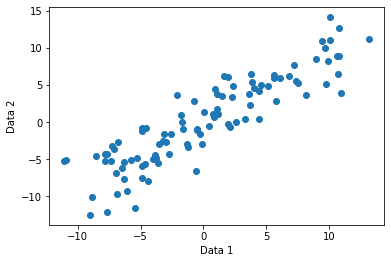

In [2]:
# Create data
num.random.seed(0)
datlen = 100
data1 = num.linspace(-10, 10, datlen) + num.random.normal(0, 2, datlen)
data2 = num.linspace(-10, 10, datlen) + num.random.normal(0, 2, datlen)
# data2 = -num.linspace(-10, 10, datlen) + num.random.normal(0, 2, datlen)
# data2 = num.random.normal(0, 2, datlen)

plt.figure()
plt.scatter(data1, data2)
plt.xlabel('Data 1')
plt.ylabel('Data 2')
plt.show()

In [3]:
covariance = num.cov(data1, data2)
print('Covariance:\n', covariance)

from scipy.stats import pearsonr, spearmanr

# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# Gaussian or Gaussian-like distribution
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
# non-Gaussian distribution
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Covariance:
 [[36.41193673 31.81399913]
 [31.81399913 34.70428363]]
Pearsons correlation: 0.895
Spearmans correlation: 0.902


Tasks
- Change sign
- Change randomness

# Non-linear

Not so trivial

# Cross Correlation and Autocorrelation

 some kind of animation is needed to show what happens
 
 Autocorrelation - how self-similar is the signal... no interest in peak at time-shift zero, rather side-peaks
 Cross Correlation - how similar are two signals, and when

In [4]:
import numpy as num
import matplotlib.pyplot as plt
from scipy import signal
import time

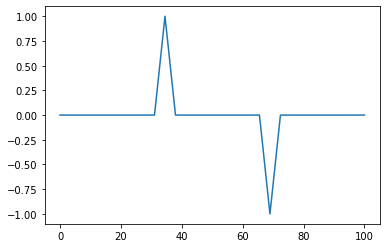

In [5]:
xdata = num.linspace(0, 100, 30)

ydata = num.zeros(len(xdata))
ydata[10] = 1
ydata[20] = -1
#ydata[30] = 1
#ydata[40] = 1

plt.figure()
plt.plot(xdata, ydata)
plt.show()

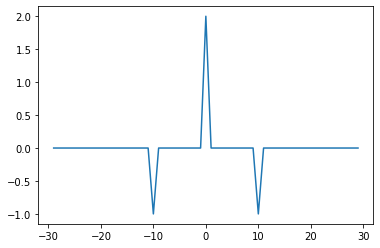

In [6]:
# Autocorrelation

corr = signal.correlate(ydata, ydata)
lags = signal.correlation_lags(len(ydata), len(ydata))

plt.figure()
plt.plot(lags, corr)
plt.show()

In [7]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def signal_correlation_animation(sig1, sig2, pausetime=0.):
    ## might be a small WARNING bug
    
    if len(sig2) > len(sig1):
        sig2_alt = sig2
        sig1_alt = sig1
    
        sig2 = sig1_alt
        sig1 = sig2_alt
        
    x1 = num.arange(len(sig1))
    x2 = num.arange(len(sig2))
    
    fig, axs = plt.subplots(2,1, figsize=(16,9))
    ax1 = axs[0]
    ax2 = axs[1]
     
    corr = signal.correlate(sig1, sig2)
    lags = signal.correlation_lags(len(sig1), len(sig2))
     
    crosscorr = [0]
    for ii in range(len(sig1) + len(sig2)):
        if ii == 0:
            continue
        
        if ii <= len(sig1):
            idxx = (ii - len(sig2))
            if idxx < 0:
                idxx = 0
            x = sig1[idxx: ii]
        else:
            xx = ii - len(sig1)
            x = sig1[xx + abs(len(sig1) - len(sig2)): ]
        
        if ii <= len(sig2):
            idxy = -ii + len(sig1)
            if idxy >= 0:
                idxy = None
            y = sig2[-ii: idxy]
        else:
            yy = ii - len(sig2)
            idxyy = len(sig1) -yy
            if idxyy > len(sig2):
                idxyy = None
            y = sig2[:idxyy]
        
        crosscorr.append(num.sum(x * y))
        
        ax1.cla()
        ax1.plot(lags, corr, color='orange', alpha=0.5, zorder=-2)
        ax1.scatter(num.arange(len(crosscorr)) - len(sig2), crosscorr, c='blue')
        
        ax2.cla()
        ax2.plot(x1 + len(sig2) - ii, sig1)
        ax2.plot(x2, sig2)
        ax2.set_xlim(-len(sig1), len(sig1) + len(sig2))

        display(fig)
        
        if pausetime >= 0.01:
            plt.pause(pausetime)
        
        if ii + 1 == len(sig1) + len(sig2):
            clear_output(wait=False)
        else:
            clear_output(wait=True)
    
    return

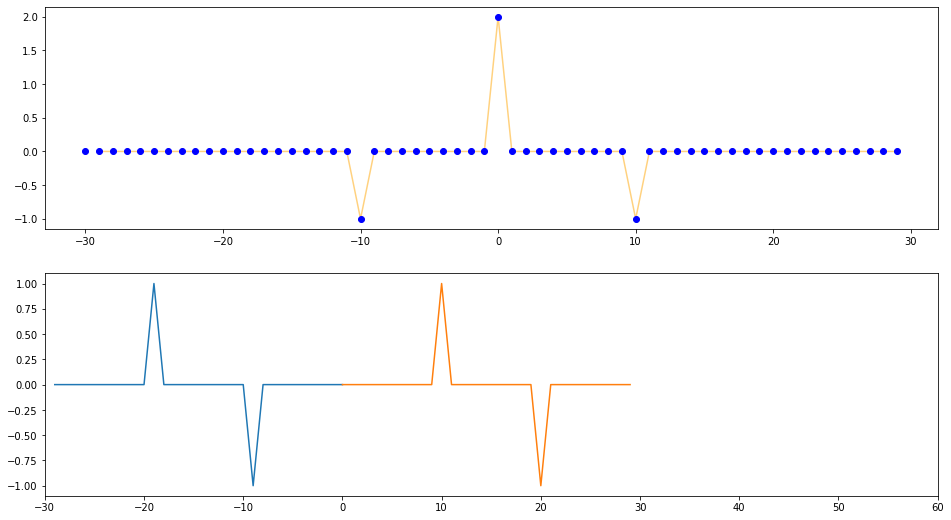

In [8]:
signal_correlation_animation(ydata, ydata, pausetime=0.001)

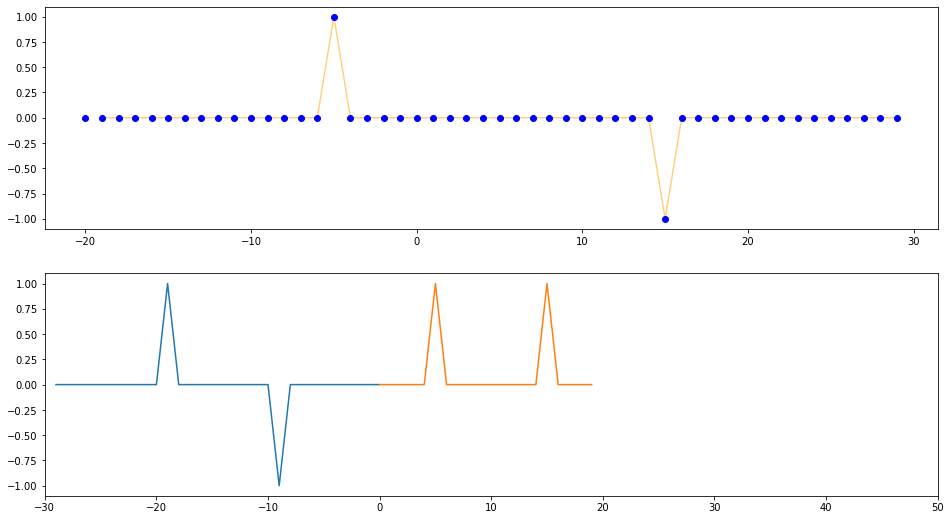

In [12]:
xdata = num.linspace(0, 100, 30)

ydata1 = num.zeros(len(xdata))
ydata1[10] = 1
ydata1[20] = -1

ydata2 = num.zeros(20)
ydata2[15] = 1
ydata2[5] = 1

signal_correlation_animation(ydata2, ydata1, pausetime=0.001)

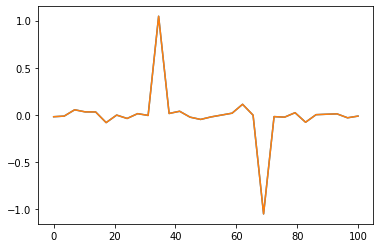

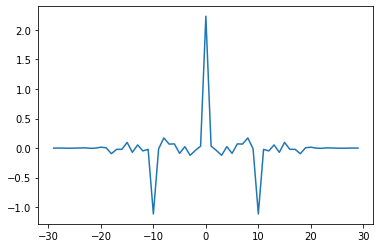

In [13]:
# With Noise


ydata1 = ydata + num.random.normal(0, 0.05, len(ydata))
ydata2 = ydata1# + num.random.normal(0, 0.01, len(ydata))

corr = signal.correlate(ydata1, ydata2)
lags = signal.correlation_lags(len(ydata1), len(ydata2))

plt.figure()
plt.plot(xdata, ydata1)
plt.plot(xdata, ydata2)
plt.show()

plt.figure()
plt.plot(lags, corr)
plt.show()

#signal_correlation_animation(ydata1, ydata2, pausetime=0.001)

# Cross Correlation

How similar are two signals


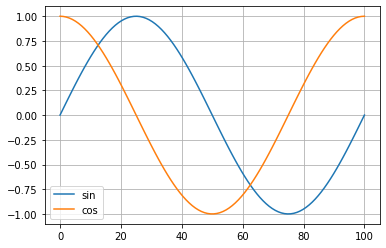

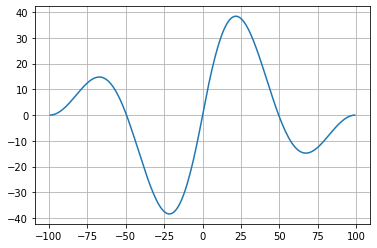

In [9]:
# Cross correlation

xdata = num.linspace(0, 100, 100)
ysin = num.sin(2*num.pi*xdata)
ycos = num.cos(2*num.pi*xdata)

plt.figure()
plt.plot(xdata, ysin, label='sin')
plt.plot(xdata, ycos, label='cos')
plt.legend()
plt.grid()
plt.show()

corr = signal.correlate(ysin, ycos)
lags = signal.correlation_lags(len(ysin), len(ycos))

plt.figure()
plt.plot(lags, corr)
plt.grid()
plt.show()

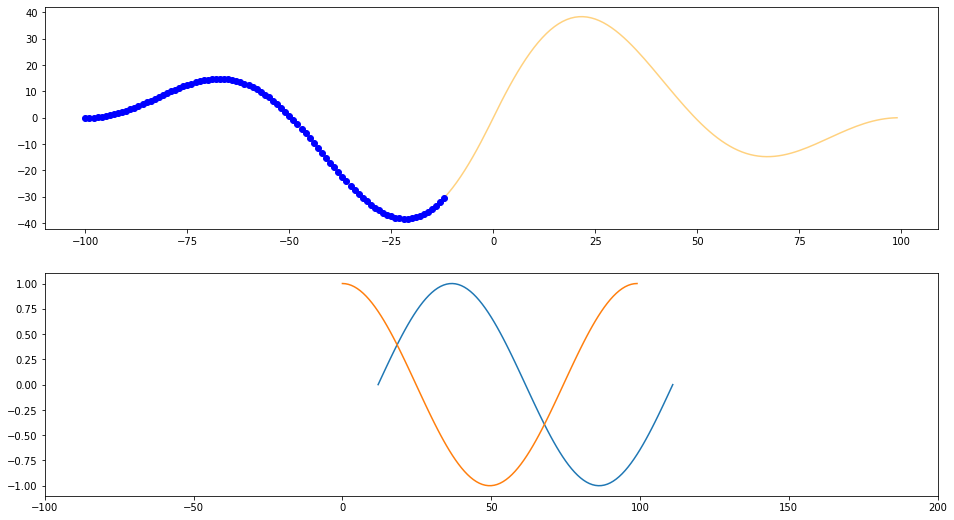

In [ ]:
signal_correlation_animation(ysin, ycos, pausetime=0.0)

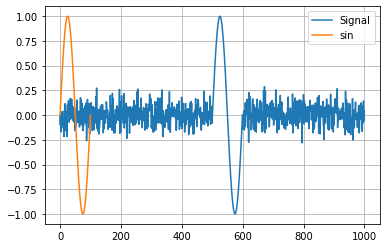

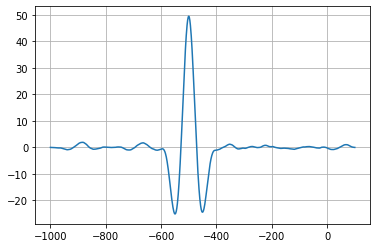

In [26]:
# With noise

xdata = num.linspace(0, 100, 100)
ysin = num.sin(2*num.pi*xdata)
#ycos = num.cos(2*num.pi*xdata)

xdata2 = num.linspace(0, 1000, 1000)
#ydata = num.zeros(len(xdata2))
ydata = num.random.normal(0, 0.1, len(xdata2))
ydata[500:500 + len(ysin)] = ysin

plt.figure()
plt.plot(xdata2, ydata, label='Signal')
plt.plot(xdata, ysin, label='sin')
plt.legend()
plt.grid()
plt.show()

corr = signal.correlate(ysin, ydata)
lags = signal.correlation_lags(len(ysin), len(ydata))

plt.figure()
plt.plot(lags, corr)
plt.grid()
plt.show()